In [1]:
import accelerator_environments
from accelerator_environments.wrappers import NormalizeAction, NormalizeObservation, ScaleReward, ScaleActuators
from accelerator_environments.utils import unwrap
import gym
from gym.wrappers import TimeLimit, Monitor
from stable_baselines3 import TD3

In [2]:
env = gym.make("ARESEA-JOSS-v1", target_translation=True, random_actuators=True, random_incoming=True, simulate_screen=True)
env = TimeLimit(env, max_episode_steps=50)
env = NormalizeAction(env)
env = NormalizeObservation(env)
env = ScaleReward(env, unwrap(env).observation_space.high[0])
env = Monitor(env, f"recordings/test", video_callable=lambda _: True)
env

initializing ocelot...


<Monitor<ScaleReward<NormalizeObservation<NormalizeAction<TimeLimit<ARESEAJOSS<ARESEA-JOSS-v1>>>>>>>

In [3]:
model = TD3.load("model-peachy-shadow-109")
model

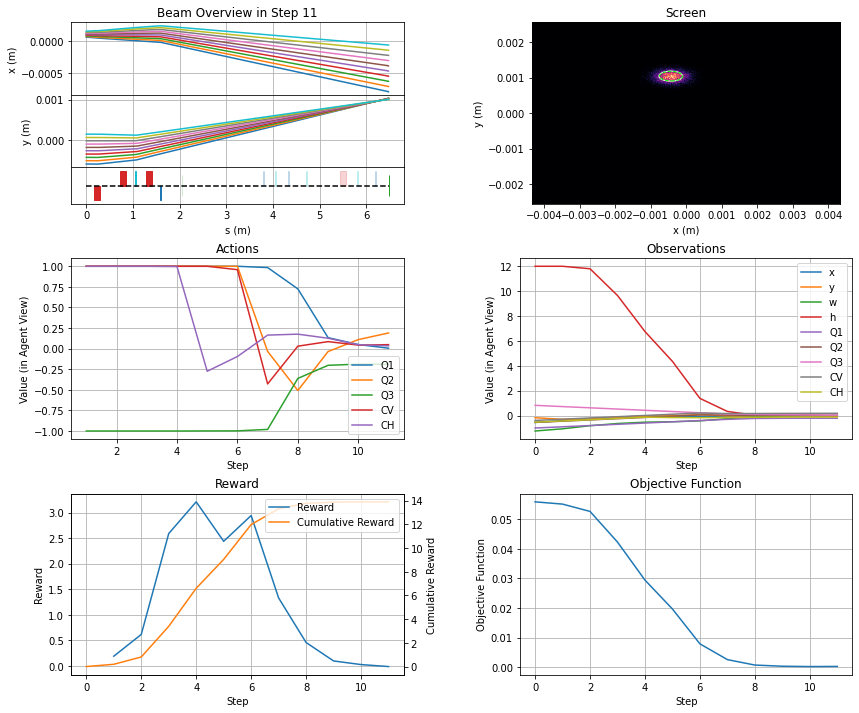

In [4]:
done = False
observation = env.reset()
while not done:
    action, _ = model.predict(observation)
    observation, reward, done, info = env.step(action)
env.close()